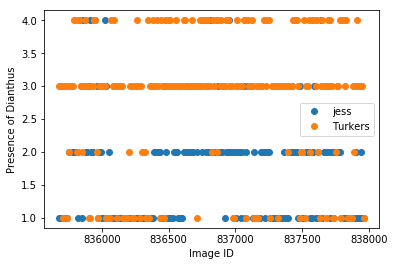

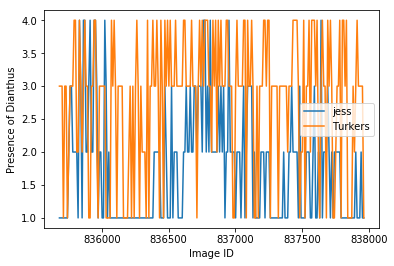

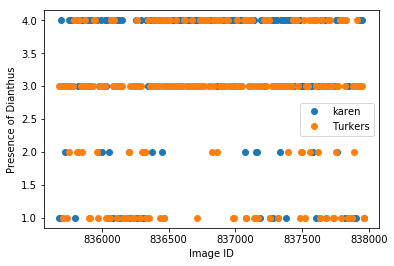

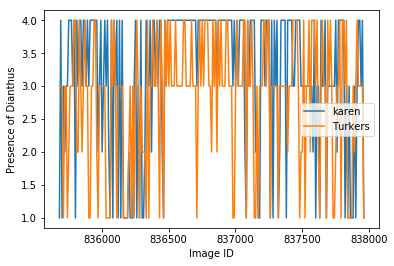

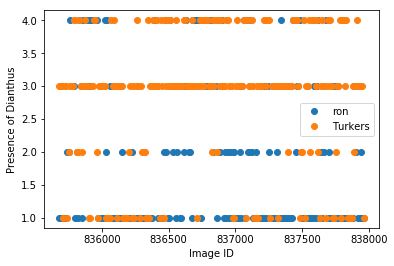

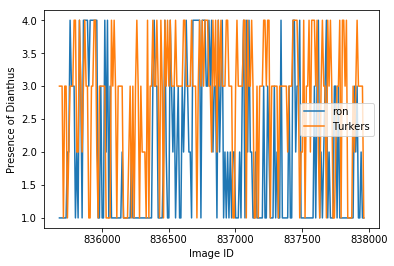

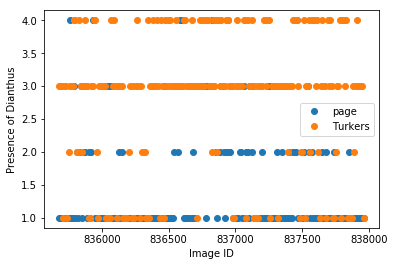

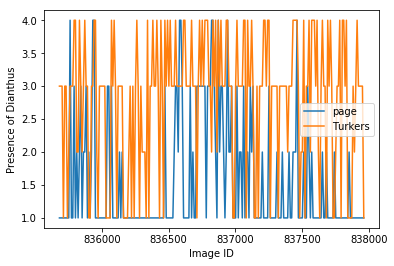

In [105]:
import os, json, yaml
import urllib.request
import ast
import pandas as pd
import glob


imlabels = {}
labels = {
  "Definitely no": 1,
    "Probably no": 2,
    "Probably yes": 3,
  "Definitely yes": 4
}

mappingFile = "abe213a-toid.yaml"
annIdToImId = yaml.load(open(mappingFile))
url_template = 'http://s3.amazonaws.com/visipedia/images/%d/original.jpg'

# load and refactor the annotation data
json_pattern = '*annotations.json'
file_list = glob.glob(json_pattern)
for file in file_list:
    imlabels = {}

    annotations = json.load(open(file))
    # print(annotations)

    # read from expert annotations
    for annId, ann in annotations:
        imFn = annIdToImId[str(annId)]
    #     print(imIds[0])
        if imFn in imlabels.keys():
            imlabels[imFn].append(int(ann['answers']['dianthus']))
        else:
            imlabels[imFn] = [int(ann['answers']['dianthus'])]


# read from turkers labels
    with open('output.manifest', 'r') as input_fid:
        pred = input_fid.readlines()
        det = [ast.literal_eval(x.strip('\n')) for x in pred]

    # print(det[1]['source-ref'][26:32]) #name
    # print(det[1]['test-label-dianthus-metadata']['confidence'])
    # print(labels[det[1]['test-label-dianthus-metadata']['class-name']])

    for item in det:
        imFn = int(item['source-ref'][26:32])
        label = int(labels[item['test-label-dianthus-metadata']['class-name']])
        confidence = float(item['test-label-dianthus-metadata']['confidence'])

    #     imlabels[imFn].append(label * confidence)
        imlabels[imFn].append(label)

    import matplotlib.pyplot as plt
    %matplotlib inline

    # plt.plot(imlabels.keys(),y)
    lists = sorted(imlabels.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples
    # plt.plot(x, y[0])
    legend = [file.split('-')[0], "Turkers"]
    for i in range(len(y[0])):
        plt.plot(x,[pt[i] for pt in y], 'o', label = legend[i])
    plt.legend()
    plt.xlabel('Image ID')
    plt.ylabel('Presence of Dianthus')
    plt.figure()
    for i in range(len(y[0])):
        plt.plot(x,[pt[i] for pt in y], label = legend[i])


    plt.legend()
    plt.xlabel('Image ID')
    plt.ylabel('Presence of Dianthus')

    plt.show()

# print(imlabels)

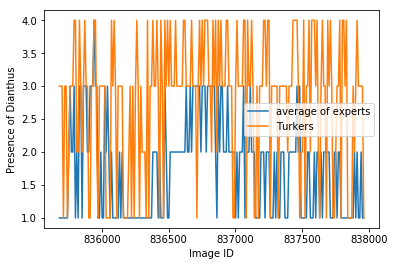

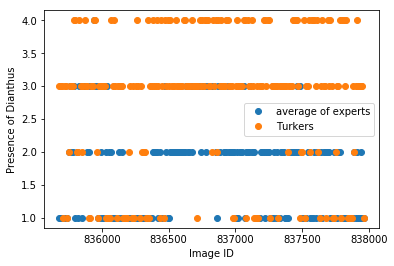

In [101]:
import os, json, yaml
import urllib.request
import ast
import pandas as pd
import glob


imlabels = {}
labels = {
  "Definitely no": 1,
    "Probably no": 2,
    "Probably yes": 3,
  "Definitely yes": 4
}

mappingFile = "abe213a-toid.yaml"
annIdToImId = yaml.load(open(mappingFile))
url_template = 'http://s3.amazonaws.com/visipedia/images/%d/original.jpg'
imlabels = {}

# load and refactor the annotation data
json_pattern = '*annotations.json'
file_list = glob.glob(json_pattern)
# print(file_list)
for file in file_list:

    annotations = json.load(open(file))
    # print(annotations)

    # read from expert annotations
    for annId, ann in annotations:
        imFn = annIdToImId[str(annId)]
#         print(imlabels.keys())
        if imFn in imlabels.keys():
#             print('why')
            imlabels[imFn].append(int(ann['answers']['dianthus']))
        else:
#             print('why')

            imlabels[imFn] = [int(ann['answers']['dianthus'])]


# read from turkers labels
with open('output.manifest', 'r') as input_fid:
    pred = input_fid.readlines()
    det = [ast.literal_eval(x.strip('\n')) for x in pred]

# print(det[1]['source-ref'][26:32]) #name
# print(det[1]['test-label-dianthus-metadata']['confidence'])
# print(labels[det[1]['test-label-dianthus-metadata']['class-name']])

for item in det:
    imFn = int(item['source-ref'][26:32])
    label = int(labels[item['test-label-dianthus-metadata']['class-name']])
    confidence = float(item['test-label-dianthus-metadata']['confidence'])

#     imlabels[imFn].append(label * confidence)
    imlabels[imFn].append(label)

import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(imlabels.keys(),y)
lists = sorted(imlabels.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
# plt.plot(x, y[0])
# print(imlabels)
legend = ["average of experts", "Turkers"]
# for i in range(len(y[0])):
plt.figure(0)
plt.plot(x,[int(sum(pt[0:-1])/len(pt[0:-1])) for pt in y], label = legend[0]) 
plt.plot(x,[pt[-1] for pt in y], label = legend[1]) 

plt.legend()
plt.xlabel('Image ID')
plt.ylabel('Presence of Dianthus')

plt.figure(1)

plt.plot(x,[int(sum(pt[0:-1])/len(pt[0:-1])) for pt in y], 'o', label = legend[0]) 
plt.plot(x,[pt[-1] for pt in y], 'o', label = legend[1]) 

plt.legend()
plt.xlabel('Image ID')
plt.ylabel('Presence of Dianthus')

plt.show()

# print(imlabels)

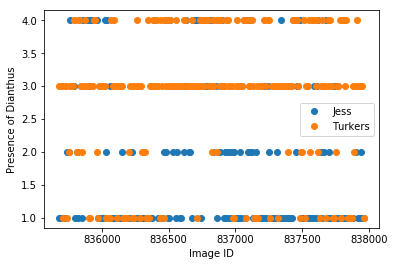

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(imlabels.keys(),y)
lists = sorted(imlabels.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
# plt.plot(x, y[0])
legend = ["Jess", "Turkers"]
for i in range(len(y[0])):
    plt.plot(x,[pt[i] for pt in y], 'o', label = legend[i])
    
plt.legend()
plt.xlabel('Image ID')
plt.ylabel('Presence of Dianthus')

plt.show()